### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Read CSV

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)

In [7]:
data.diagnosis = [1 if each == 'M' else 0 for each in data.diagnosis]

In [8]:
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y = data.diagnosis.values

In [10]:
x_data = data.drop(["diagnosis"],axis=1)

### Normalization

In [11]:
x = (x_data - np.min(x_data)/(np.max(x_data)-np.min(x_data))).values

### Train Test Split

In [12]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [13]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test=y_test.T

### Parameter Initialize

In [14]:
def initialize_weigths_and_bias(dim):
    w = np.full((dim,1),0.01)
    b=0.0
    return w,b

In [15]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [16]:
print(sigmoid(5))

0.9933071490757153


In [22]:
def forward_backward_propagation(w,b,x_train,y_train):
    # Forward Propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1-y_train) * np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    
    # Backward Propagation
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias":derivative_bias}
    return cost,gradients

In [29]:
def update(w,b,x_train,y_train,learning_rate,number_of_iterarion):
    cost_list = []
    cost2_list=[]
    index = []
    
    #Updating(Learning) parameters is_number_of_iteration times
    for i in range(number_of_iterarion):
        # Make Forward and Backward propagation and find cost and gradients
        cost, gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        #update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost2_list.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i,cost))
            
        #we update(learn) parameters, weights and bias
        parameters = {"weight":w,"bias":b}
        plt.plot(index,cost2_list)
        plt.xticks(index,rotation="vertical")
        plt.xlabel("Number of Iteration")
        plt.ylabel("Cost")
        plt.show()
        
        return parameters,gradients,cost_list

In [19]:
def predict(w,b,x_test):
    # x_test is a inğut for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one
    # if z is smaller than 0.5, our prediction is sign zero
    
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
    return y_prediction

In [32]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,num_iteration):
    dimension = x_train.shape[0]
    w,b = initialize_weigths_and_bias(dimension)
    
    #don't change leraning reate
    parameters,gradients,cost_list = update(w,b,x_train,y_train,learning_rate,num_iteration)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    # y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
   # print("train accuracy: {}".format(100-np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {}".format(100-np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: nan


/home/red/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/red/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


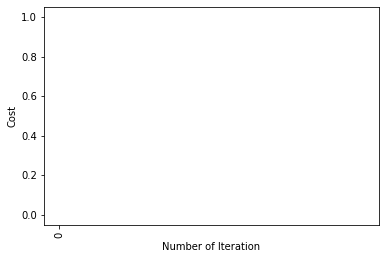

test accuracy: 62.280701754385966


/home/red/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [34]:
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=1,num_iteration=100)

## With SKLearn Library

In [36]:
from sklearn.linear_model import LogisticRegression

In [38]:
LReg = LogisticRegression()
LReg.fit(x_train.T,y_train.T)
print("Test accuracy {}".format(LReg.score(x_test.T,y_test.T)))

Test accuracy 0.956140350877193


/home/red/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
